# 신경망을 위한 데이터 표현

- 텐서(tensor)
  - 다차원 넘파이 배열
  - 데이터를 위한 컨테이너
  - 임의의 차원 개수를 가지는 행렬의 일반화된 모습
  - 텐서에 차원을 축(axis)이라고 부름
  - rank : 텐서의 축 개수


In [1]:
import numpy as np

### 1. 스칼라(0D 텐서)
- 하나의 숫자만 담고 있는 텐서
- 0차원 텐서

In [2]:
x = np.array(12)
x

array(12)

In [3]:
x.ndim

0

In [4]:
x.shape #값 하나가 있는 스칼라

()

### 2. 벡터(1D 텐서)
- 숫자 배열
- 하나의 축을 가짐
- rank-1 텐서

In [5]:
x = np.array([12,3,4,6,7,14])

In [6]:
x.ndim #1차원

1

In [7]:
x.shape #1D텐서 = 벡터

(6,)

### 3. 행렬(2D 텐서)
- 벡터의 배열
- 2개의 축 : 행(row)과 열(column)
- rank-2 텐서

In [9]:
x = np.array([[1,4,5,2,1],
             [3,5,2,1,3],
             [3,4,5,1,9]])
x

array([[1, 4, 5, 2, 1],
       [3, 5, 2, 1, 3],
       [3, 4, 5, 1, 9]])

In [10]:
x.ndim

2

In [11]:
x.shape

(3, 5)

### 4. 3D 텐서와 고차원 텐서

In [12]:
x = np.array([[[1,4,5],
             [3,5,2],
             [3,4,5]],
             [[1,4,5],
             [3,5,2],
             [3,4,5]]])
x

array([[[1, 4, 5],
        [3, 5, 2],
        [3, 4, 5]],

       [[1, 4, 5],
        [3, 5, 2],
        [3, 4, 5]]])

In [13]:
x.ndim

3

In [14]:
x.shape

(2, 3, 3)

In [15]:
x.dtype

dtype('int64')

### 텐서의 핵심 속성
- 축의 개수(랭크) : numpy.ndim에 저장
- 크기(shape) : 텐서의 차원, 파이썬의 튜플 형식
- 데이터 타입(dtype) : 텐서에 포함된 데이터 형식, float32, uint8, float 64

#### MNIST 데이터셋

In [19]:
import keras
keras.__version__

'3.2.1'

In [18]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [20]:
from keras.datasets import mnist

(train_X, train_y), (test_x, test_y) = mnist.load_data() #npz - numpy 형태의 파일

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [21]:
train_X.shape #3차원 텐서 28 X 28이 6만개

(60000, 28, 28)

In [26]:
train_X.dtype

dtype('uint8')

In [27]:
train_X[4].max(), train_X[4].min()

(255, 0)

In [32]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

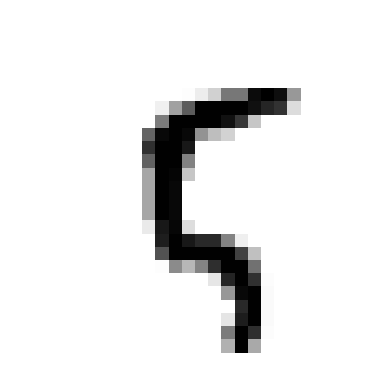

In [35]:
import matplotlib.pyplot as plt

plt.imshow(train_X[100], cmap=plt.cm.binary)
plt.axis('off')
plt.show()

### 배치(batch) 데이터

- 딥러닝에서 데이터 사용 시 전체 데이터셋을 처리하지 않음
- 작은 배치(batch)로 나누어 학습

#MNISAT dataset : 128 batch

batch = train_X[:128]

batch = train_X[128:128*2]

batch = train_X[128*2:128*3]

...

batch = train_X[123*n:128*(n+1)]

### 텐서의 실제 사례

- 벡터 데이터 : 일반적인 데이터셋 형식
  - 2D텐서 : (samples, features)
  - 예.
    - 인구통계 데이터셋 : 나이, 성별, 소득으로 구성된 10만명 데이터
      - 전체 데이터셋 : (100000, 3)
    - 각 문서별 2만개 단어로 구성된 500개 문서 데이터셋 : (500, 20000)

- 시계열 데이터(시퀀스 데이터)
  - 3D텐서 : (samples, times, features)
  - 예. 
    - 주식가격데이터셋 : 1분마다 현재주식가격, 최고가격, 최소가격 저장, 하루거래시간 390분, 250일치 데이터 (250, 390, 3)
    - 트윗 데이터셋 : 각 트윗은 128개 알파벳으로 구성된 280개 문자 시퀀스로 100만개 트윗 데이터 (1000000, 280, 128)

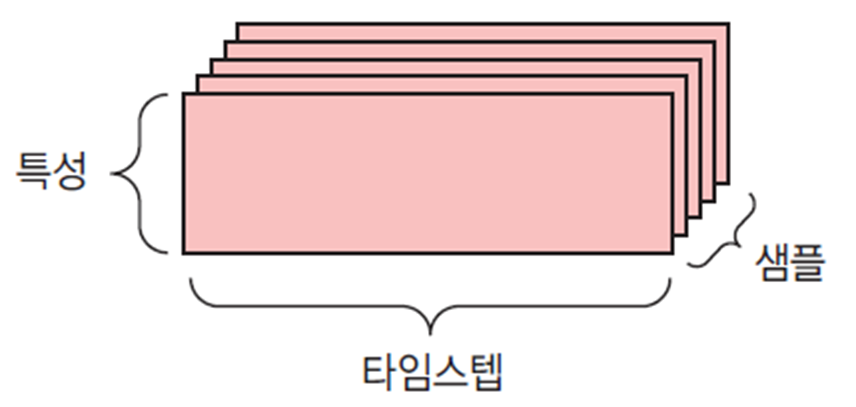

- 이미지 데이터 
  - 4D텐서 : (samples, height, width, color_depth)
  - 예.
    - 흑백이미지 : (128, 256, 256, 1)
    - 컬러이미지 : (128, 256, 256, 3)

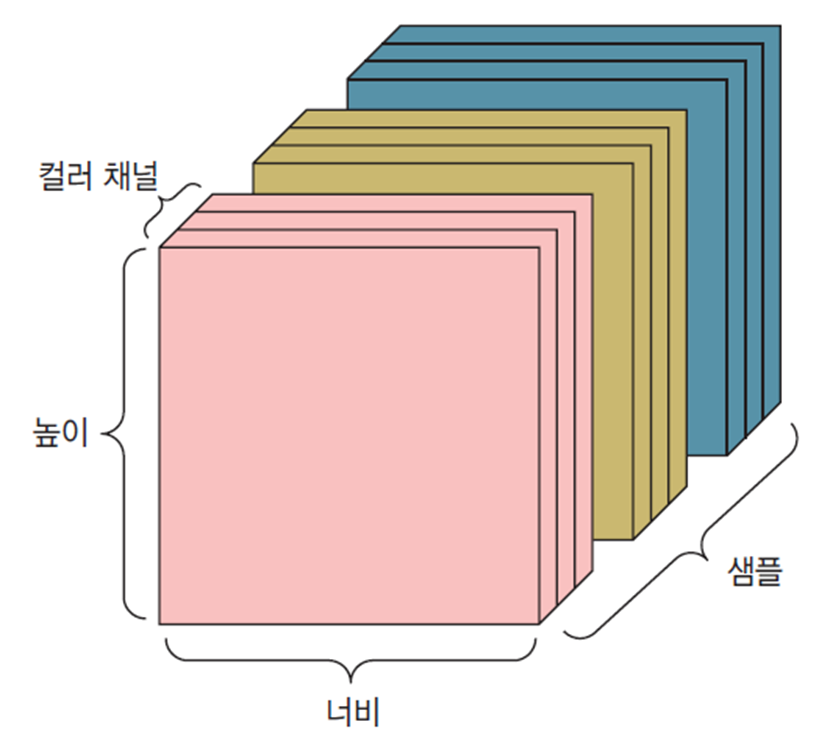

- 비디오 데이터
  - 5D텐서 : (samples, frames, height, width, color_depth)
  - 예. 
    - 60초짜리 144*256 유투브 비디오 클립을 4초프레임으로 샘플링하면 240프레임, 이런 비디오 클립 4개가진 배치데이터 : (4, 240, 144, 256, 3)

# 텐서 연산

### 1. 원소별 연산(element-wise operation)
 - 원소별 곱셈, 덧셈, 뺄셈

In [36]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shpae[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j], 0)
    return x

In [37]:
x = np.random.random((20, 100))
y = np.random.random((20, 100))
z = np.maximum(z,0)
z = x + y

### 2. 브로드캐스팅(broadcasting)

단계
- 큰 텐서의 ndim에 맞도록 작은 텐서에 (브로드캐스팅 축이라고 부르는) 축이 추가됨
- 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복됨


In [41]:
x = np.random.random((2, 2, 3))
y = np.random.random((2, 3))
z = np.maximum(x,y)
print(x)
print(y)
z

[[[0.5413466  0.48782693 0.75822482]
  [0.95491127 0.79038043 0.19066584]]

 [[0.54632422 0.67671624 0.19556568]
  [0.96708008 0.8920331  0.7629125 ]]]
[[0.14391495 0.0112149  0.39975585]
 [0.64099927 0.97301351 0.66760401]]


array([[[0.5413466 , 0.48782693, 0.75822482],
        [0.95491127, 0.97301351, 0.66760401]],

       [[0.54632422, 0.67671624, 0.39975585],
        [0.96708008, 0.97301351, 0.7629125 ]]])

### 3. 텐서 점곱(dot operation)

- np.dot(x, y)

- 텐서 원소간 연산

In [ ]:
x = np.random.random((2, 2, 3))
y = np.random.random((3, 2))
# z = np.maximum(x,y)
# x + y
# 에러 나옴 (행, 열 크기가 달라서) 

In [43]:
x = np.random.random((3, 2))
y = np.random.random((2, 2))
np.dot(x,y)

array([[0.47971714, 0.34670982],
       [0.12873571, 0.15096671],
       [0.75946498, 0.36707816]])

In [48]:
x = np.random.random((2, 3))
y = np.random.random((3, 2))
print(f'x: \n {x}\n y: \n{y}')
np.dot(x,y)

x: 
 [[0.47076608 0.93228408 0.11116311]
 [0.15775152 0.91921756 0.89227384]]
 y: 
[[0.44059979 0.83317713]
 [0.30806782 0.95973941]
 [0.55885    0.70941487]]


array([[0.55674967, 1.36584207],
       [0.85133387, 1.6466366 ]])

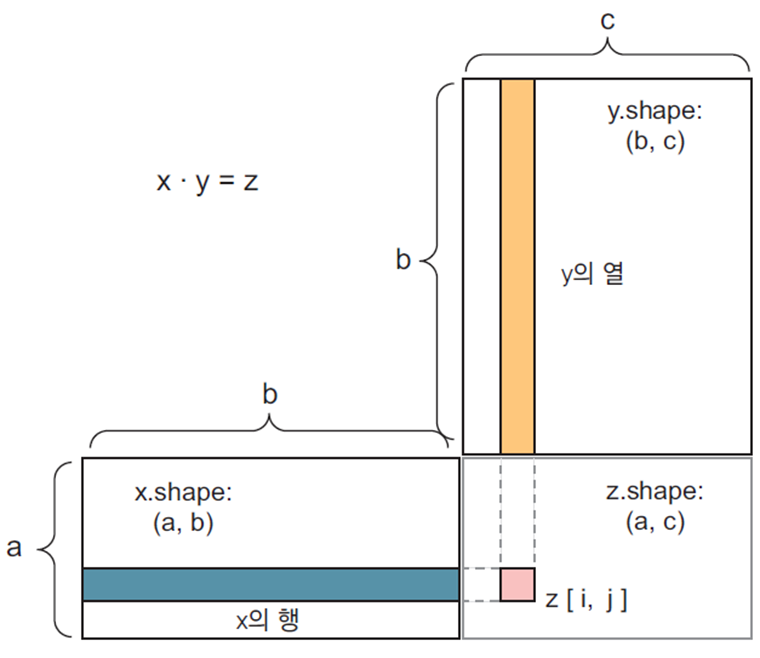

### 4. 텐서 크기 변환

- reshape()
- transpose()

### 5. 텐서 연산의 기하학적 해석

- 아핀 변환(Affin Transformation)
    - y = wx + b
    - 어떤 행렬과 점곱하여 얻는 선형변환과 벡터를 더해 얻는 이동의 조합
- 기하학적 연산 : 회전(rotarion), 이동(translation), 크기변경(scaling), 기울이기(skewing)
- 선형변환 : 임의의 행렬과 점곱(dot)

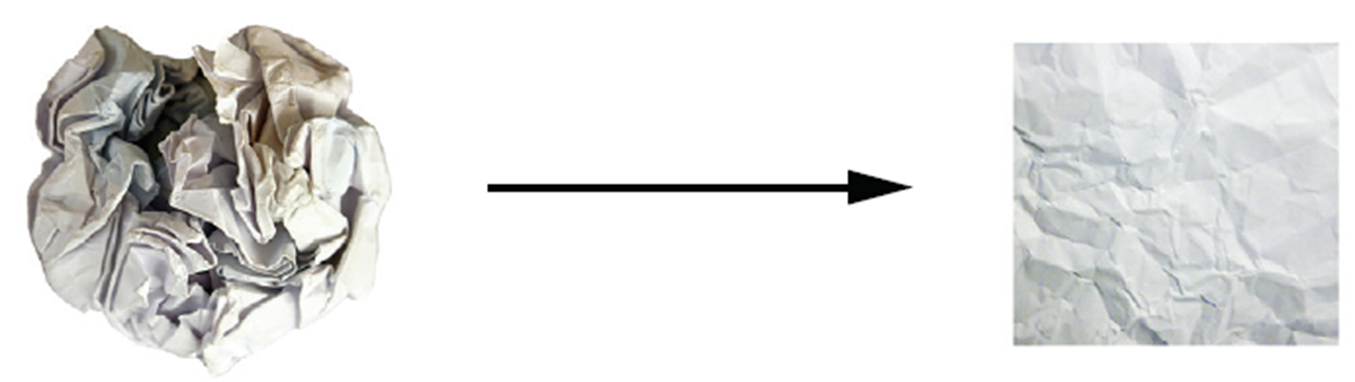